# ***Classification: MNIST Dataset***

#### ***Code by: Om Mule***

### Download dataset

In [70]:
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib as mpl
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [2]:
# Download the dataset

mnist = fetch_openml('mnist_784', version=1, data_home="D:\Deep Learning and Machine Learning Online Degree\Hands on Machine Learning Book codes\Classification", as_frame=True)

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
x, y = mnist["data"], mnist["target"]

x.shape

(70000, 784)

In [5]:
y.shape

(70000,)

### Plot an image 

<class 'numpy.ndarray'>


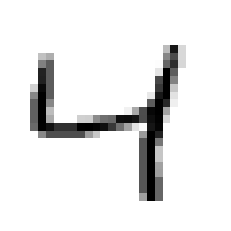

The number is:  4


In [6]:
# Display image 

digit = x.to_numpy()[2]
digit_image = digit.reshape(28, 28)
print(type(digit_image))


plt.imshow(digit_image, cmap="binary")
plt.axis("off")
plt.show()
print("The number is: ",y[2])

In [7]:
# Casting y t integer

y = y.astype(np.uint8)

In [8]:
# Train test split of data

x_train, x_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]

In [9]:
x_test.shape

(10000, 784)

## Binary Classifier

In [10]:
# Target vectors

y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

# True for label=5 & False for other digits

In [11]:
y_train_5

0         True
1        False
2        False
3        False
4        False
         ...  
59995    False
59996    False
59997     True
59998    False
59999    False
Name: class, Length: 60000, dtype: bool

### ***SGD Classifier using Scikit-Learn***

In [13]:
# SGD Classifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(x_train, y_train_5)

SGDClassifier(random_state=42)

<class 'numpy.ndarray'>


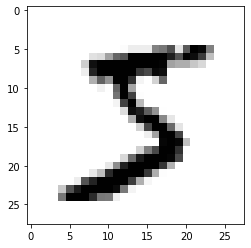

In [32]:
some_digit = x_train.to_numpy()[0]
some_digit_image = some_digit.reshape(28,28)
print(type(some_digit_image))

plt.imshow(some_digit_image, cmap="binary")

In [39]:
# Predict using the classifier

sgd_clf.predict([some_digit])

array([ True])

In [44]:
some_digit.shape

(784,)

### ***Performance Measures: Cross Validation(accuracy)***

In [46]:
from sklearn.model_selection import cross_val_score

# cv: The number of folds
cross_val_score(sgd_clf,X= x_train, y=y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

### ***Performance Measures: Confusion Matrix***

In [48]:
# Get predictions

from sklearn.model_selection import cross_val_predict
y_preds = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3)

In [51]:
# Confusion Matrix

confusion_matrix(y_train_5, y_preds)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

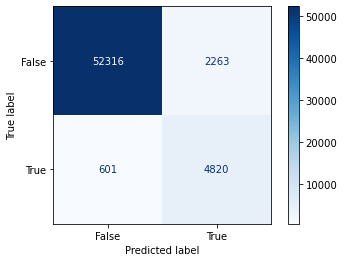

In [60]:
sklearn.metrics.plot_confusion_matrix(sgd_clf, x_train, y_train_5, cmap=plt.cm.Blues)

#### ***Perfect Confusion matrix: Only true positives & true negatives***

In [62]:
# Precision & Recall score 

print("Precision: ",precision_score(y_train_5, y_preds))
print("Recall: ", recall_score(y_train_5, y_preds))

Precision:  0.8370879772350012
Recall:  0.6511713705958311


In [76]:
# F1 Score

print("F1 score[SGD Classifier]: ", f1_score(y_train_5, y_preds))

F1 score[SGD Classifier]:  0.7325171197343846


In [67]:
y_scores = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3, method="decision_function")

### ***Random Forest Classifier (Much Better F1 score)***

In [71]:
# Trying random forests

rforest_clf = RandomForestClassifier(random_state=42)
rforest_clf.fit(x_train, y_train_5)
rforest_preds = cross_val_predict(rforest_clf, x_train, y_train_5, cv=3)

In [75]:
print("F1 score[Random Forests Classifier]: ",f1_score(y_train_5, rforest_preds))

F1 score[Random Forests Classifier]:  0.9242275142688446
